In [ ]:
import copy
import glob
import os
import pprint
import random

import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
# возможные элементы стиля
styles = {
    'прическа':[
        'нет волос',
        'длинные в пучок',
        'длинные волнистые',
        'длинные прямые',
        'короткая волнистые',
        'короткая прямые',
        'короткая курчавые'
    ],
    'цвет волос':[
        'черный',
        'блонд',
        'каштановый',
        'пастельный розовый',
        'рыжий',
        'серебристо серый',
    ],
    'аксессуар':[
        'нет очков',
        'круглые очки',
        'солнцезащитные очки',
    ],
    'одежда':[
        'худи',
        'комбинезон',
        'футболка с круглым вырезом',
        'футболка с V-вырезом',
    ],
    'цвет одежды':[
        'черный',
        'синий',
        'серый',
        'зеленый',
        'оранжевый',
        'розовый',
        'красный',
        'белый'
    ],
}
# количество элементов стиля в наблюдаемых данных
styles_count = {
    'прическа':[
        7,
        0,
        1,
        23,
        1,
        11,
        7
    ],
    'цвет волос':[
        7,
        6,
        2,
        3,
        8,
        24,
    ],
    'аксессуар':[
        11,
        22,
        17,
    ],
    'одежда':[
        7,
        18,
        19,
        6,
    ],
    'цвет одежды':[
        4,
        5,
        6,
        8,
        6,
        8,
        7,
        6
    ],
}

# Задание:

1. определить вероятности встретить элемент одежды;
2. с их помощью случайно собрать стиль;
3. реализовать алгоритм со сглаживанием;
4. реализовать байесовскую генерацию изображений.

# Стандартные вероятности:

In [ ]:
feature = 'прическа'
temp = sum(styles_count[feature])
flag = True

for style, count in styles_count.items():
    amount = sum(count)
    print(f'{style}: {amount}')
    if amount != temp: # проверка на неточности в данных
        flag = False
        print('Ошибка! Количество наблюдений различается')
        break

прическа: 50
цвет волос: 50
аксессуар: 50
одежда: 50
цвет одежды: 50


Подсчитываем частотные вероятности по полиномиальной формуле:

In [ ]:
prob = {}

for style in styles.keys():
    prob[style] = []
    for i, i_style in enumerate(styles_count[style]):
       p = styles_count[style][i] / sum(styles_count[style])
       prob[style].append(p)

pprint.pprint(prob)      

{'аксессуар': [0.22, 0.44, 0.34],
 'одежда': [0.14, 0.36, 0.38, 0.12],
 'прическа': [0.14, 0.0, 0.02, 0.46, 0.02, 0.22, 0.14],
 'цвет волос': [0.14, 0.12, 0.04, 0.06, 0.16, 0.48],
 'цвет одежды': [0.08, 0.1, 0.12, 0.16, 0.12, 0.16, 0.14, 0.12]}


Проверка вероятностей:

In [ ]:
for style in styles:
  print(f'{style}: {sum(prob[i])}')

прическа: 1.0
цвет волос: 1.0
аксессуар: 1.0
одежда: 1.0
цвет одежды: 1.0


Как можно заметить, присутствуют нулевые вероятности, некоторые позиции никогда не будут выбраны

Генерация стилей:

In [ ]:
result_style = {}

for feature in styles:
  p_acc = prob[feature]
  acc = styles[feature]
  result_style[feature] = random.choices(acc, p_acc)[0]

if result_style['прическа'] == 'нет волос':
   del result_style['цвет волос']

pprint.pprint(result_style)

{'аксессуар': 'круглые очки',
 'одежда': 'комбинезон',
 'прическа': 'нет волос',
 'цвет одежды': 'белый'}


# Вариация со сглаживанием:

In [ ]:
res = 0

for i in styles_count:
    for j in styles_count[i]:
        if j == 0:
            res += 1

print(f'Количество нулевых элементов: {res}')

Количество нулевых элементов: 1


In [ ]:
prob_2 = {}

for style in styles.keys():
    prob_2[style] = []
    for i, i_style in enumerate(styles_count[style]):
       fixed_sum = sum(styles_count[style]) + len(styles_count[style])
       p = (styles_count[style][i] + 1) / fixed_sum # сглаживание
       prob_2[style].append(round(p, 3))

pprint.pprint(prob_2) 

{'аксессуар': [0.226, 0.434, 0.34],
 'одежда': [0.148, 0.352, 0.37, 0.13],
 'прическа': [0.14, 0.018, 0.035, 0.421, 0.035, 0.211, 0.14],
 'цвет волос': [0.143, 0.125, 0.054, 0.071, 0.161, 0.446],
 'цвет одежды': [0.086, 0.103, 0.121, 0.155, 0.121, 0.155, 0.138, 0.121]}


Как может быть видно, теперь все все вероятности отличны от нуля

Проверка вероятностей:

In [ ]:
for style in styles:
  print(f'{style}: {sum(prob_2[i])}')

прическа: 1.0
цвет волос: 1.0
аксессуар: 1.0
одежда: 1.0
цвет одежды: 1.0


Генерация стилей:

In [ ]:
result_style = {}

for feature in styles:
  p_acc = prob_2[feature]
  acc = styles[feature]
  result_style[feature] = random.choices(acc, p_acc)[0]

if result_style['прическа'] == 'нет волос':
   del result_style['цвет волос']

pprint.pprint(result_style)

{'аксессуар': 'солнцезащитные очки',
 'одежда': 'комбинезон',
 'прическа': 'длинные в пучок',
 'цвет волос': 'блонд',
 'цвет одежды': 'оранжевый'}


# Генерация изображений:

In [ ]:
!unzip avatars.zip

Archive:  avatars.zip
  inflating: avatars/avataaars (10).png  
  inflating: avatars/avataaars (11).png  
  inflating: avatars/avataaars (12).png  
  inflating: avatars/avataaars (13).png  
  inflating: avatars/avataaars (14).png  
  inflating: avatars/avataaars (4).png  
  inflating: avatars/avataaars (5).png  
  inflating: avatars/avataaars (6).png  
  inflating: avatars/avataaars (7).png  
  inflating: avatars/avataaars (8).png  
  inflating: avatars/avataaars (9).png  


In [ ]:
img_path = 'avatars'
full_paths = glob.glob(os.path.join(img_path, '*.png'))

Посмотрим на изображения:

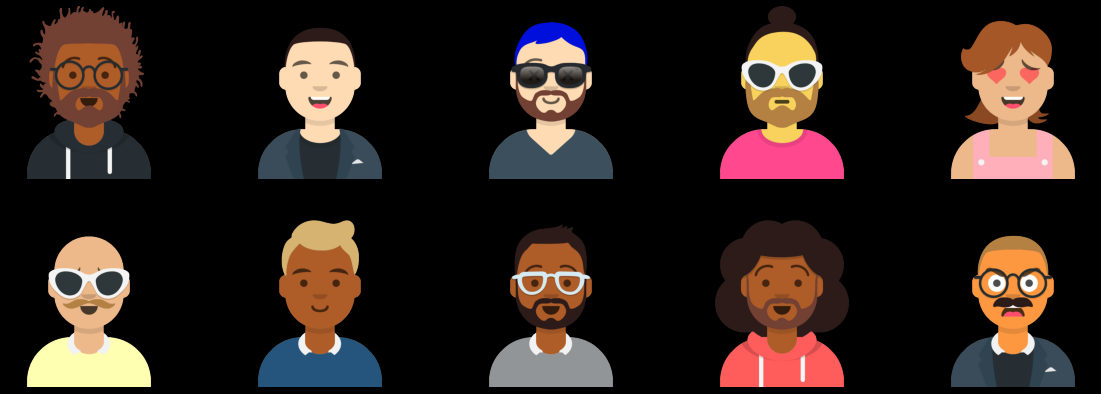

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(20, 7), facecolor='black')
k = 0

for i in range(2):
  for j in range(5):
    ax[i, j].imshow(plt.imread(full_paths[k]))
    ax[i, j].axis('off')
    k += 1
plt.show()

Размер изображений:

In [ ]:
img = cv2.imread(full_paths[0], 1)
print(img.shape)

(560, 528, 3)


Составим многомерный масссив из картинок:

In [ ]:
images = []

for path in full_paths:
    img = cv2.imread(path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

images = np.array(images)

print(images.shape)

(11, 560, 528, 3)


Получим массив из количества сколько каждое значение каждого пикселя встретилось раз:

In [ ]:
amounts = np.zeros((560, 528, 3, 256))

for img in tqdm(range(images.shape[0])):
    for i in range(images.shape[1]):
        for j in range(images.shape[2]):
            for k in range(images.shape[3]):
                amounts[i][j][k][images[img][i][j][k]] += 1

100%|██████████| 11/11 [00:15<00:00,  1.43s/it]


Получим вероятности по частоте и проверим не ошиблись ли мы где-нибудь:

In [ ]:
probabilities = amounts / images.shape[0] # вероятности цветов для каждого пикселя

print(probabilities.sum(axis=3).sum()) # 560 x 528 x 3 т.е. везде единицы
print(560 * 528 * 3)

887040.0
887040


Как можно заметить, все сходится, получены единицы по каждому каналу пикселя

Сгенерируем свое изображение согласно частотам цветов пикселей по каналам, которые мы получили ранее:

In [ ]:
def naive_pic():
  pic = np.zeros((560, 528, 3)) 
  choose_from = np.arange(256, dtype=np.float32) / 255
  
  for i in range(pic.shape[0]):
      for j in range(pic.shape[1]):
          for k in range(pic.shape[2]):
              prob = np.random.choice(choose_from, size=1, p=probabilities[i][j][k])
              pic[i][j][k] = prob
  return pic

Первая попытка:

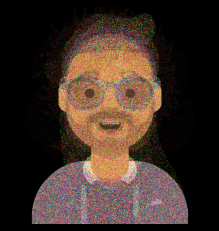

In [ ]:
plt.figure(facecolor='black')
plt.imshow(naive_pic())
plt.axis('off')
plt.show()

Попробуем снова, чтобы получить большее разнообразие:

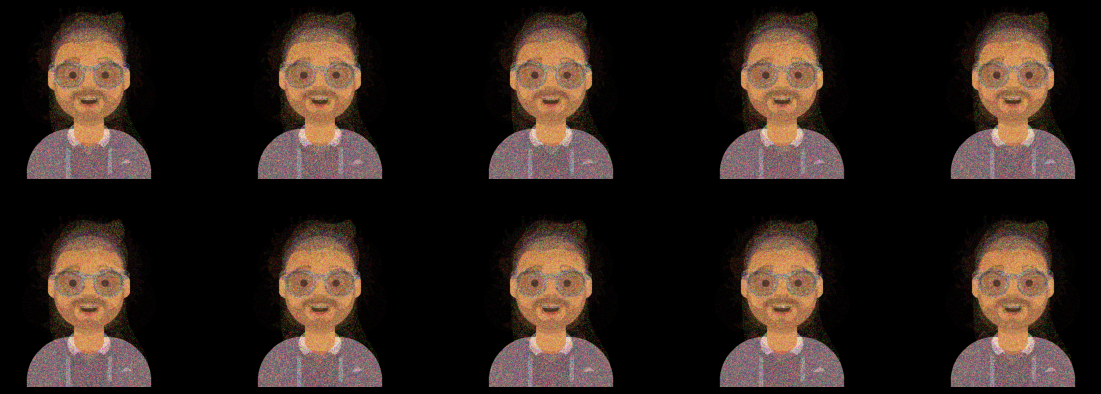

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(20, 7), facecolor='black')

for i in range(2):
    for j in range(5):
        ax[i, j].imshow(naive_pic())
        ax[i, j].axis('off')

plt.show()

По всей видимости, распределение цветов пикселей по каналам такого, что, чтобы получить сильно различающиеся изображения, необходимо иметь более обширную выборку. Однако, уже сейчас можно заметить, что алгоритм наивной байесовской генерации является не самым лучшим выбором для решения подобных задач.


# Уменьшеним разрешение:

Повторим предыдущие действия для изображений меньшего разрешения, чтобы пронаблюдать большую вариативность генерации

In [ ]:
img = cv2.imread(full_paths[0], 1)
print(img.shape)

(560, 528, 3)


In [ ]:
images = []
scale_percent = 50

for path in full_paths:
    img = cv2.imread(path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
    
    height = int(img.shape[0] * scale_percent / 100)
    width = int(img.shape[1]*scale_percent / 100)
    dsize = (height, width)

    output = cv2.resize(img, dsize)

    images.append(output)


images = np.array(images)

print(images.shape)

(11, 264, 280, 3)


In [ ]:
amounts = np.zeros((264, 280, 3, 256))

for img in tqdm(range(images.shape[0])):
    for i in range(images.shape[1]):
        for j in range(images.shape[2]):
            for k in range(images.shape[3]):
                amounts[i][j][k][images[img][i][j][k]] += 1

100%|██████████| 11/11 [00:03<00:00,  3.35it/s]


In [ ]:
probabilities = amounts / images.shape[0] # вероятности цветов для каждого пикселя

print(probabilities.sum(axis=3).sum()) # 264 x 280 x 3 т.е. везде единицы
print(264 * 280 * 3)

221760.0
221760


In [ ]:
def naive_pic():
  pic = np.zeros((264, 280, 3)) 
  choose_from = np.arange(256, dtype=np.float32) / 255
  
  for i in range(pic.shape[0]):
      for j in range(pic.shape[1]):
          for k in range(pic.shape[2]):
              prob = np.random.choice(choose_from, size=1, p=probabilities[i][j][k])
              pic[i][j][k] = prob
  return pic

Посмотрим на изображение:

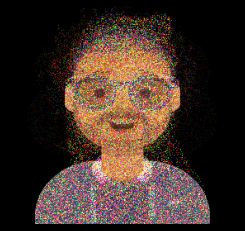

In [ ]:
plt.figure(facecolor='black')
plt.imshow(naive_pic())
plt.axis('off')
plt.show()

Посмотрим на большее количество изображений:

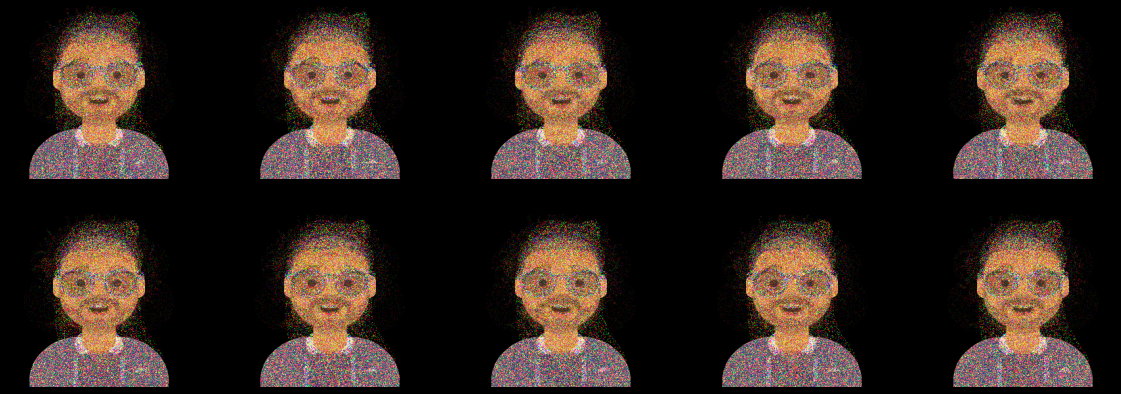

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(20, 7), facecolor='black')

for i in range(2):
    for j in range(5):
        ax[i, j].imshow(naive_pic())
        ax[i, j].axis('off')

plt.show()

Видно больше различий в сгенерированных изображениях, однако, сами изображения все равно не слишком разнообразны